In [3]:
#  importações para tratamentos de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
# Imports para ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
df = pd.read_csv('infopreco.csv', sep=';', encoding='latin1')

In [27]:
df.head()

,CNPJ,NOME,ENDEREÇO,COMPLEMENTO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,300357000195,POSTO E TRANSPORTADORA PEGORARO,"RODOVIA BR 163,S/N",KM 786,ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,59",05/07/2018 18:55


In [28]:
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'COMPLEMENTO', 'BAIRRO', 'MUNICÍPIO', 'UF',
       'PRODUTO', 'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

In [29]:
# plot de calor adaptado para verificar dados faltantes
def grafico_dados_faltantes(_df):
    plt.figure(figsize=(15,5))
    return sns.heatmap(_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

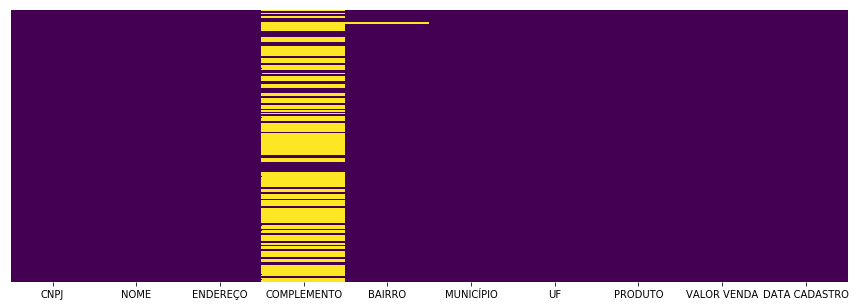

In [30]:
# gerar gráfico para verificar dados faltantes
grafico_dados_faltantes(df);

#### Como podemos observar no gráfico acima, a coluna COMPLEMENTO está com  muitos dados faltantes acredito que não seja uma coluna relevante para nós. Vamos exclui-la.

In [31]:
df.drop(['COMPLEMENTO'], axis=1, inplace=True)
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'BAIRRO', 'MUNICÍPIO', 'UF', 'PRODUTO',
       'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

#### Agora vamos dar uma olhada na coluna BAIRRO os valores que estiverem Nan e vamos preencher com "Bairro não cadastrado"

In [20]:
df['BAIRRO'].fillna(('Bairro não cadastrado'), inplace=True)

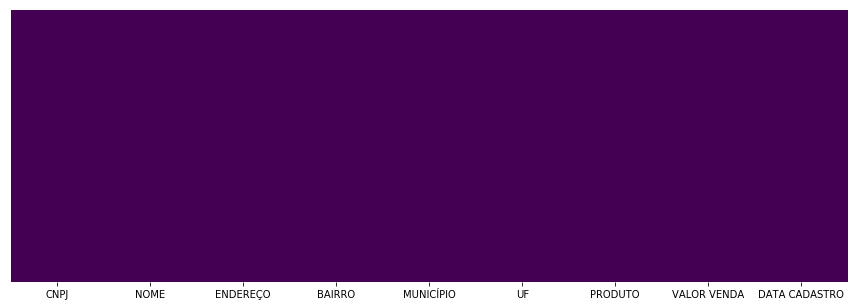

In [22]:
grafico_dados_faltantes(df);

#### Vamos ver qual combústivel está em nossa base de dados

In [42]:
df.PRODUTO.unique()

array(['Gasolina C Comum', 'Etanol', 'Diesel S500', 'Diesel S10', 'GNV'],
      dtype=object)

In [45]:
df.groupby(['PRODUTO'])['PRODUTO'].count()

PRODUTO
Diesel S10          159
Diesel S500         121
Etanol              131
GNV                  13
Gasolina C Comum    175
Name: PRODUTO, dtype: int64